<a href="https://colab.research.google.com/github/fajarafriad1/Data-Analysis-and-Machine-Learning/blob/main/HR%20Attrition%20Analysis%20and%20Prediction/HR_Attrition_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/bootcamp xsis/IBM HR Attrition Analysis
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/bootcamp xsis/IBM HR Attrition Analysis


### Import Library

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Import Dataset

In [66]:
df = pd.read_csv('IBM-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Data Understanding

In [67]:
df.shape

(1470, 35)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [69]:
df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [70]:
df.describe(include=['int64', 'float64'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [71]:
df[df.isna().any(axis=1)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [72]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


### Exploratory Data Analysis (EDA)

#### Univariant Analysis

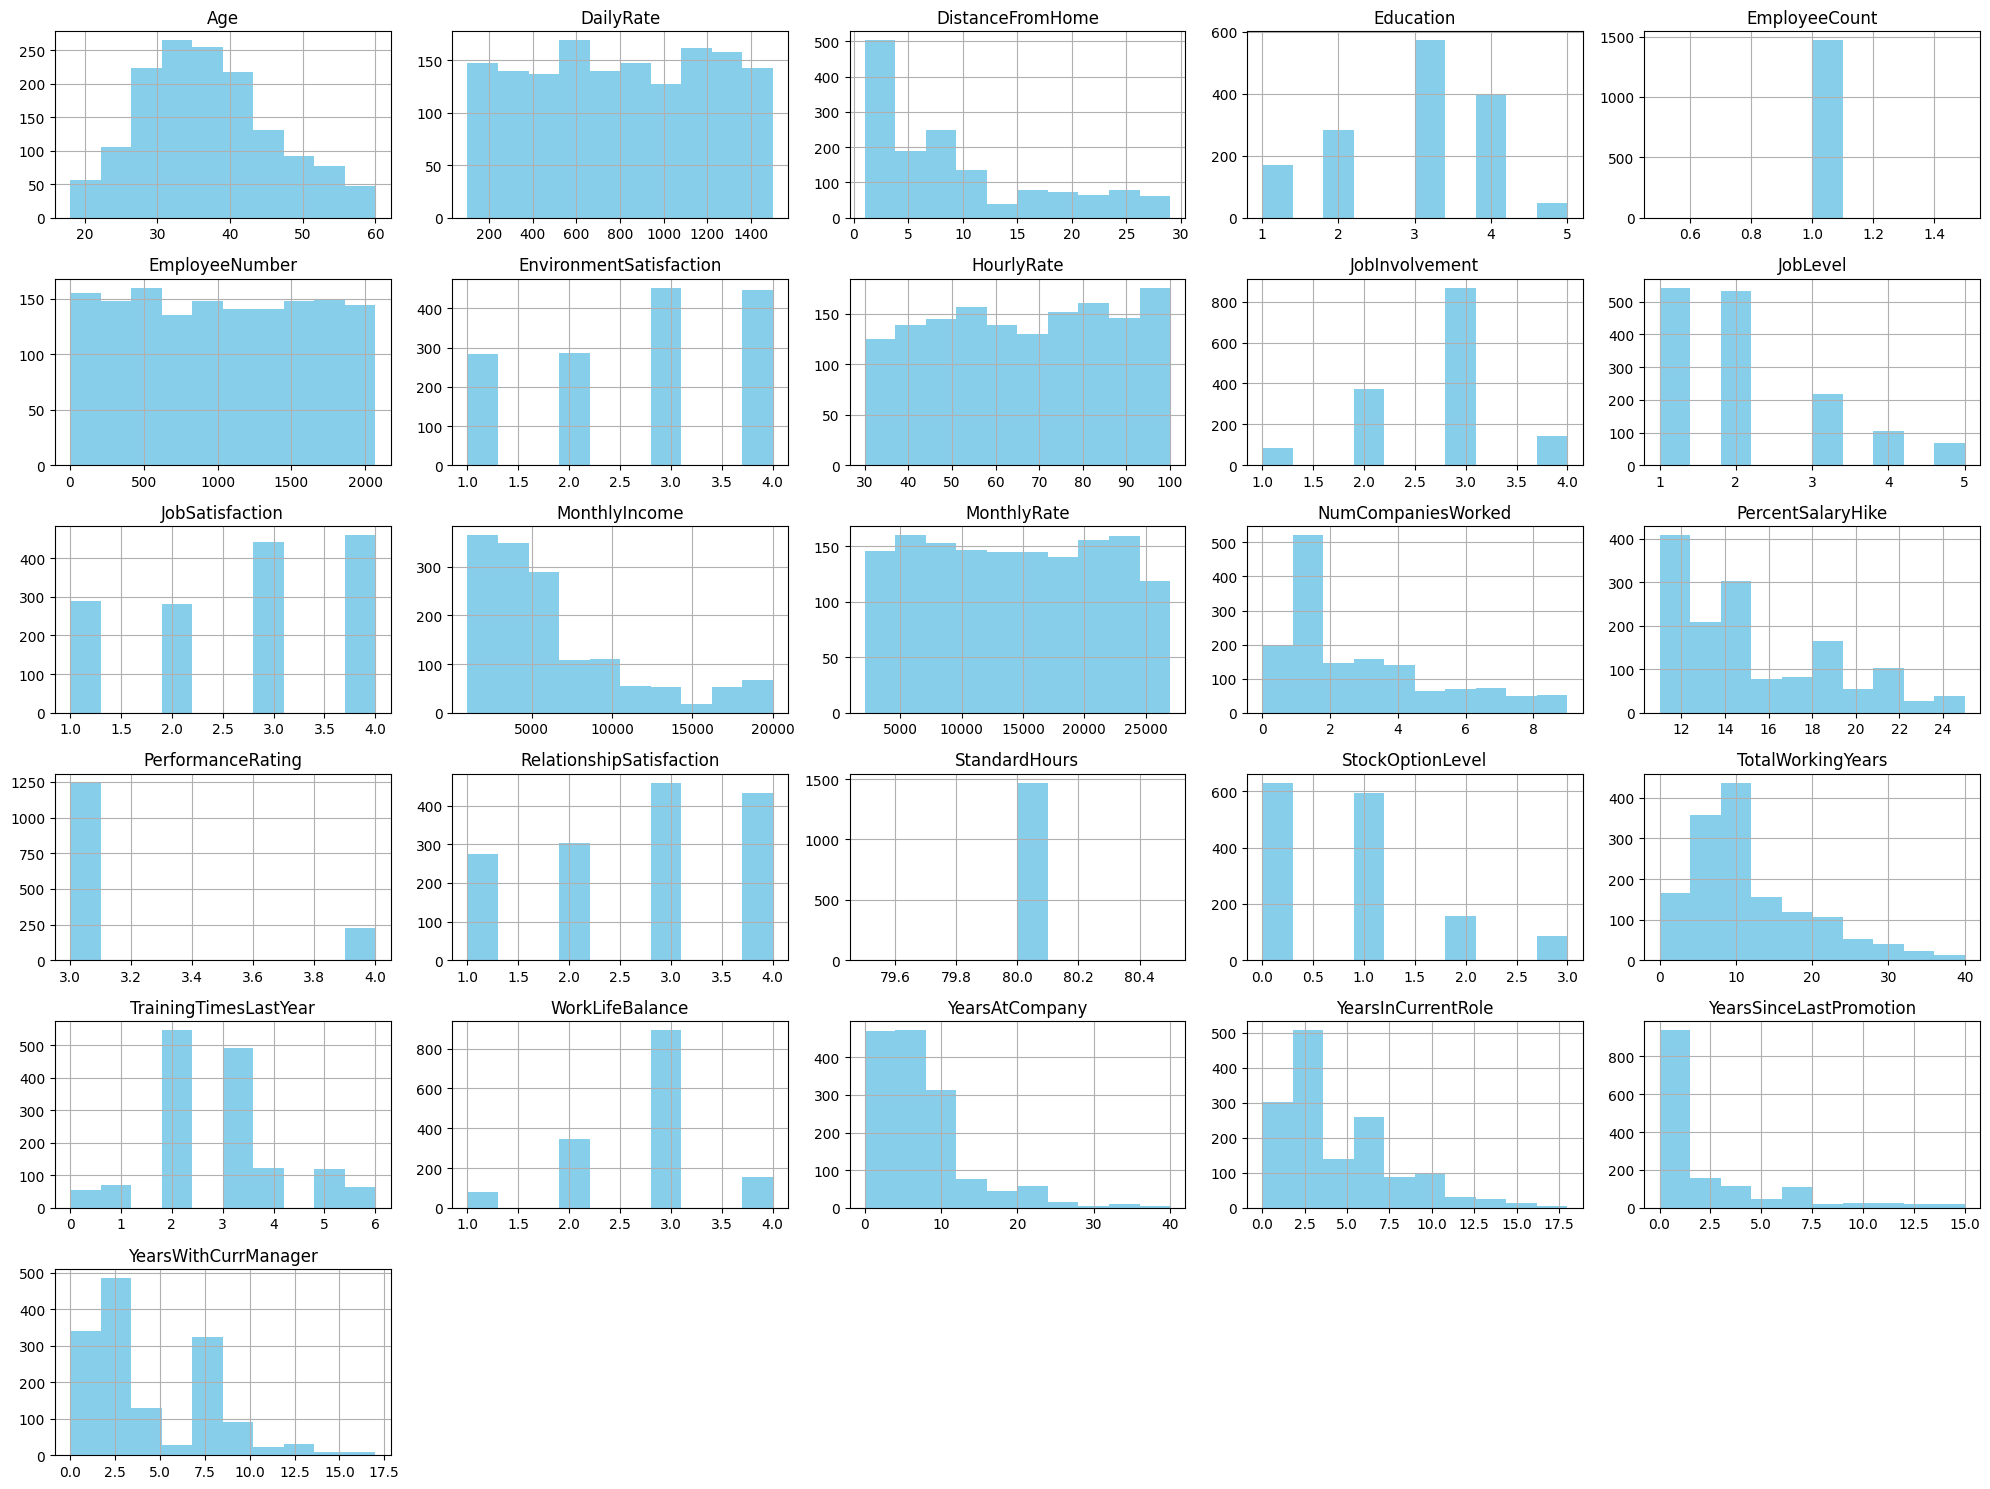

In [73]:
df.hist(figsize=(20,15), color='skyblue')
plt.tight_layout()
plt.show()

In [74]:
def attrition_rate(col):
  df_attrition_rate = df.copy()
  df_attrition_rate['Attrition'] = np.where(df_attrition_rate['Attrition'] == 'Yes', 1, 0)

  if df_attrition_rate[col].dtype == object:
    df_attrition_rate = df_attrition_rate.groupby(col)['Attrition'].agg(['sum', 'count'])
    df_attrition_rate['attrition_rate'] = round((df_attrition_rate['sum']/df_attrition_rate['count']) * 100,2)
    df_attrition_rate['dist'] = round((df_attrition_rate['count']/df_attrition_rate['count'].sum()) * 100,2)
    df_attrition_rate = df_attrition_rate.sort_values(by='attrition_rate', ascending=True)
    #return df_attrition_rate

  elif df_attrition_rate[col].dtype == np.float64 or df_attrition_rate[col].dtype == np.int64:
    nunique = df_attrition_rate[col].nunique()
    if nunique > 1 and nunique < 8:
      df_attrition_rate[col] = df_attrition_rate[col].astype(str)
      df_attrition_rate = df_attrition_rate.groupby(col)['Attrition'].agg(['sum', 'count'])
      df_attrition_rate['attrition_rate'] = round((df_attrition_rate['sum']/df_attrition_rate['count']) * 100,2)
      df_attrition_rate['dist'] = round((df_attrition_rate['count']/df_attrition_rate['count'].sum()) * 100,2)

    else :
      df_attrition_rate[col+'_bin'] = pd.qcut(df_attrition_rate[col], q=4, duplicates='drop')
      df_attrition_rate = df_attrition_rate.groupby(col+'_bin')['Attrition'].agg(['sum', 'count'])
      df_attrition_rate['attrition_rate'] = round((df_attrition_rate['sum']/df_attrition_rate['count']) * 100,2)
      df_attrition_rate['dist'] = round((df_attrition_rate['count']/df_attrition_rate['count'].sum()) * 100,2)
      df_attrition_rate.index = df_attrition_rate.index.astype('str')

  fig, ax1  = plt.subplots(1,1, figsize=(6,2))
  plt.tick_params(axis='x', rotation = 45)
  # left axis
  ax1 = sns.barplot(data=df_attrition_rate, x=df_attrition_rate.index, y='count', color='skyblue')
  ax1.set_title(f'Attrition Rate by {col}', pad=20, fontsize=10)
  ax2 = ax1.twinx()
  ax2 = sns.lineplot(data=df_attrition_rate, x=df_attrition_rate.index, y = 'attrition_rate',  marker='o', markerfacecolor='red', color='orange', label='% attrition Rate')
  ax2.spines.top.set_visible(False)
  ax1.spines.top.set_visible(False)

  for x,y in zip(df_attrition_rate.index, df_attrition_rate['attrition_rate']):
    label = "{:.1f}%".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center')

  for container in ax1.containers:
    ax1.bar_label(container)

  xlabels = ax1.get_xticklabels()
  if len(xlabels) > 2:
    ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
  else:
    ax1.set_xticklabels(xlabels, rotation=0)

In [75]:
one_unique_col = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if df[col].nunique() == 1 or df[col].nunique() == df[col].count()]
print(one_unique_col)

ord_col = [col for col in df.select_dtypes(include='int64').columns if df[col].nunique() > 1 and df[col].nunique() < 8]
print(ord_col)

num_col = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]
num_col = [i for i in num_col if i not in one_unique_col + ord_col]
print(num_col)

obj_col = [col for col in df.select_dtypes(include=object).columns if df[col].nunique() > 1]
num_col = [i for i in num_col if i not in one_unique_col + ord_col]
obj_col.remove('Attrition')
print(obj_col)

binary_col = [col for col in obj_col if df[col].nunique() == 2]
print(binary_col)

['EmployeeCount', 'EmployeeNumber', 'StandardHours']
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Gender', 'OverTime']


In [76]:
one_unique_col = [col for col in df.select_dtypes(include=['int64', 'float64', object]).columns if df[col].nunique() == 1 or df[col].nunique() == df[col].count()]
print(one_unique_col)

ord_col = [col for col in df.select_dtypes(include='int64').columns if df[col].nunique() > 1 and df[col].nunique() < 8]
print(ord_col)

num_col = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]
num_col = [i for i in num_col if i not in one_unique_col + ord_col]
print(num_col)

obj_col = [col for col in df.select_dtypes(include=object).columns if df[col].nunique() > 1]
obj_col.remove('Attrition')
print(obj_col)

binary_col = [col for col in obj_col if df[col].nunique() == 2]
print(binary_col)

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Gender', 'OverTime']


In [77]:
df = df.drop(one_unique_col, axis=1) # drop column that have i unique values

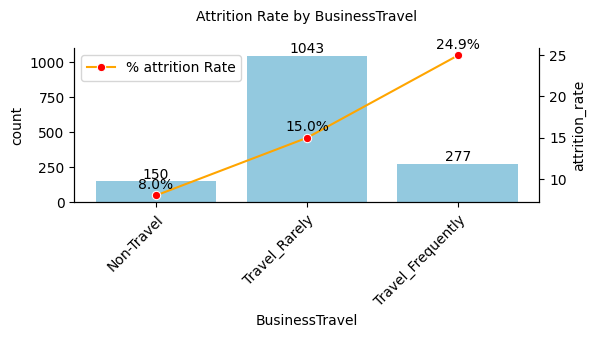

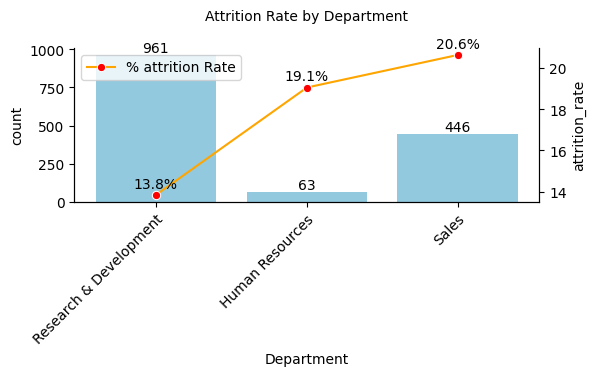

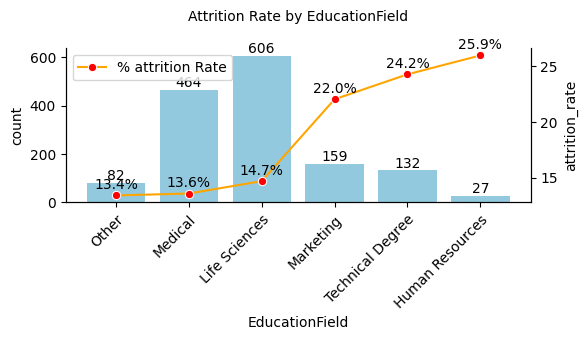

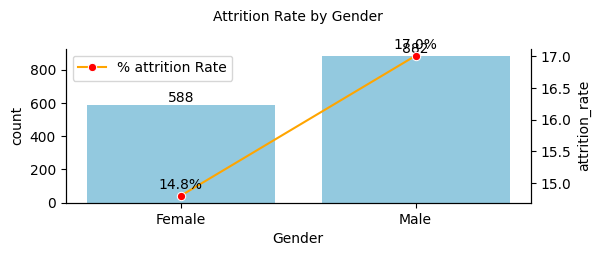

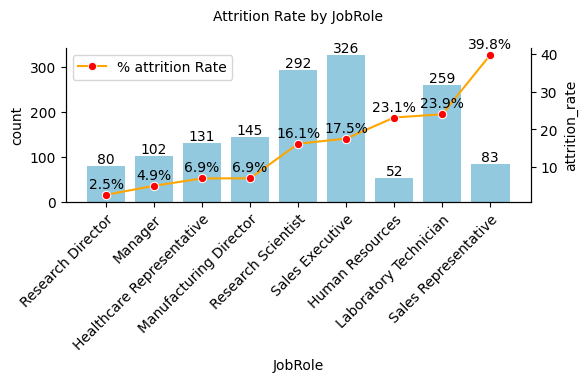

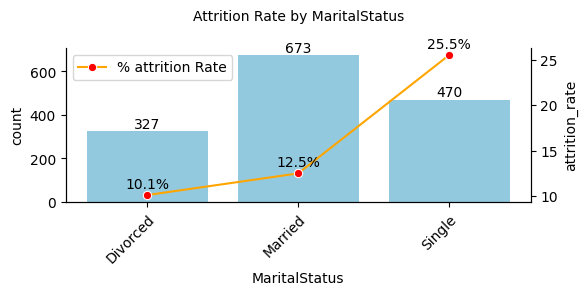

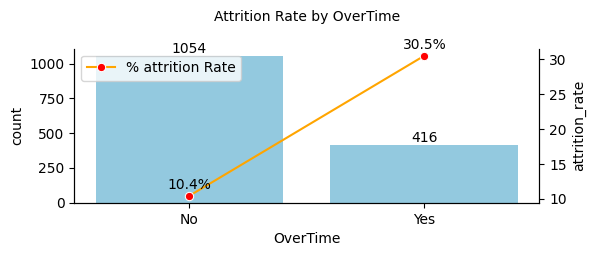

In [78]:
for col in obj_col:
  attrition_rate(col)

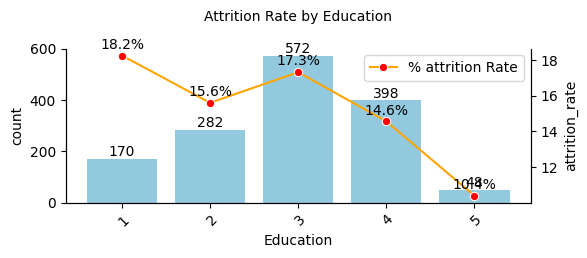

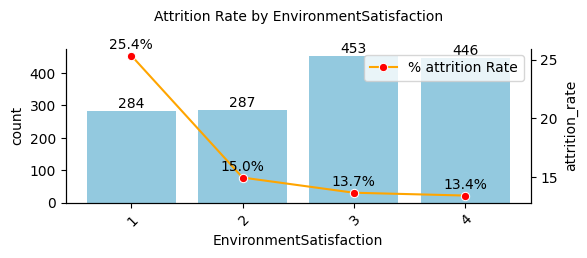

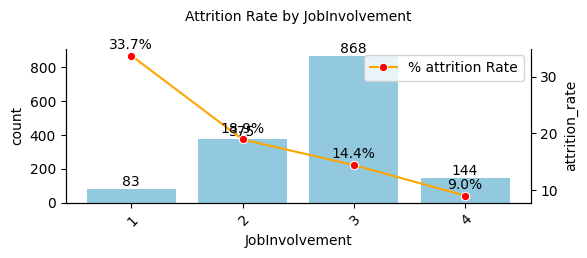

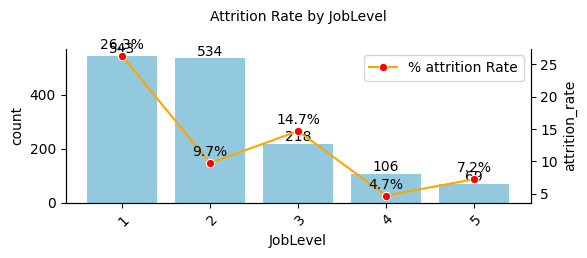

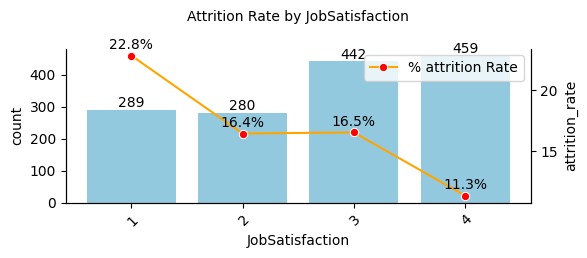

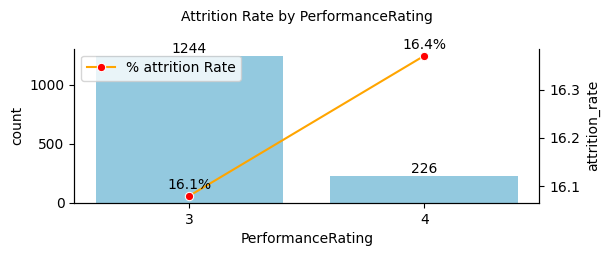

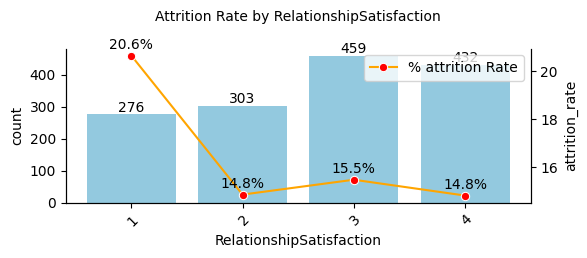

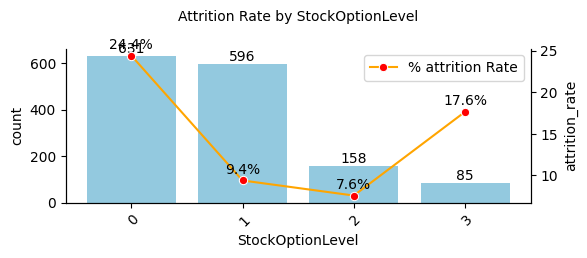

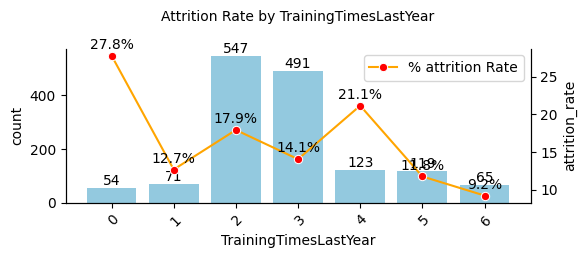

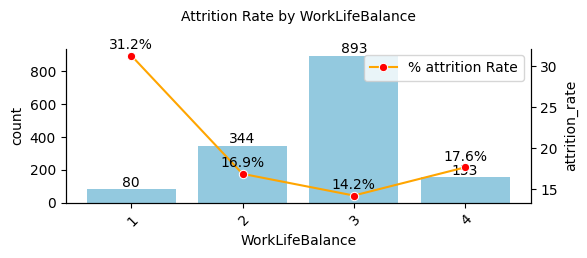

In [79]:
for col in ord_col:
  attrition_rate(col)

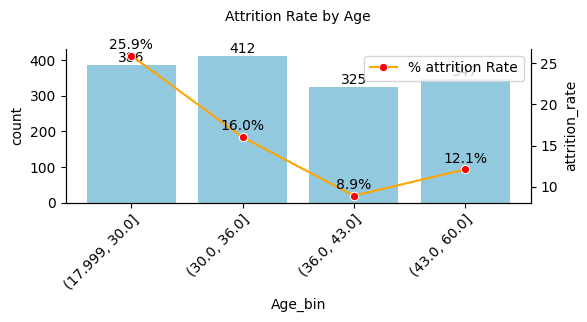

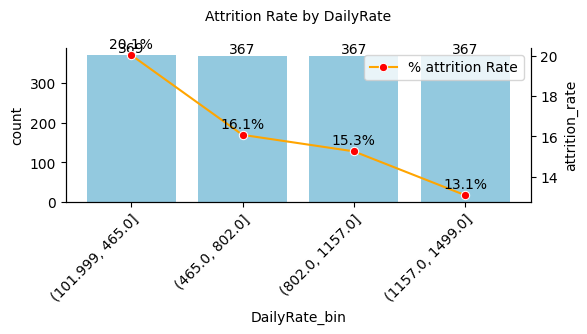

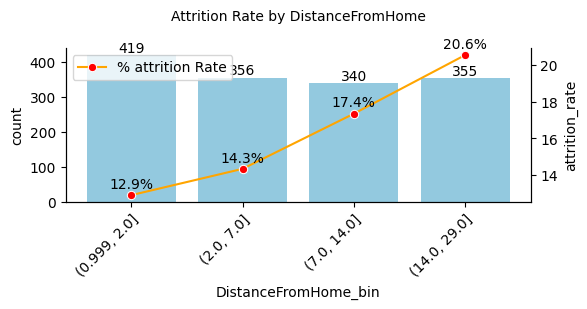

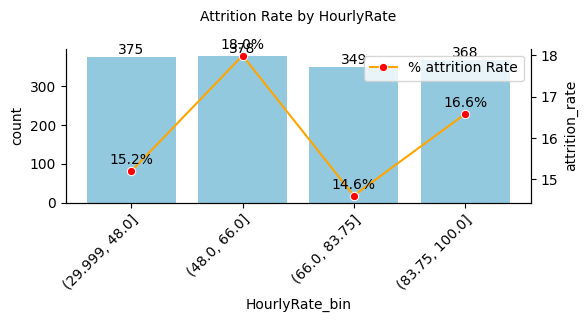

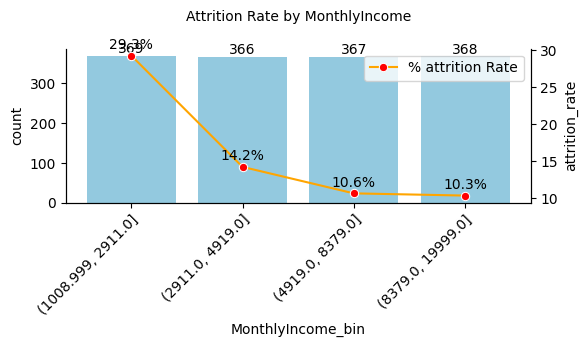

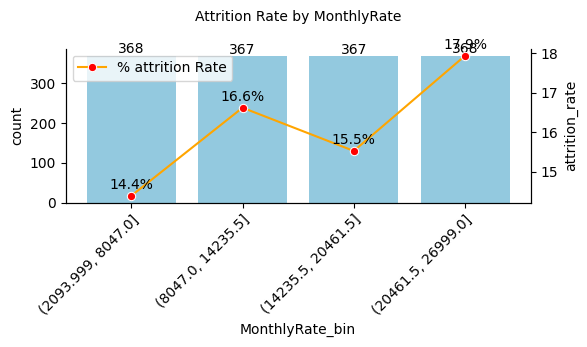

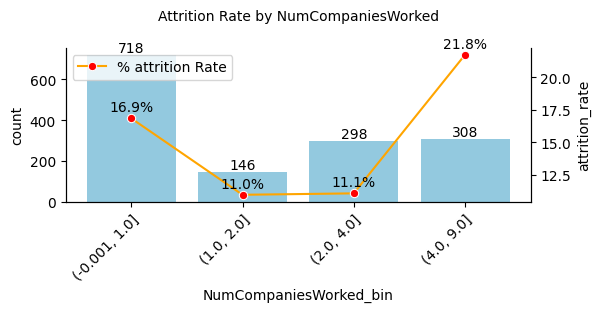

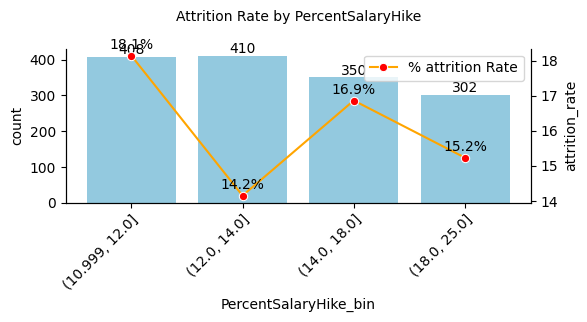

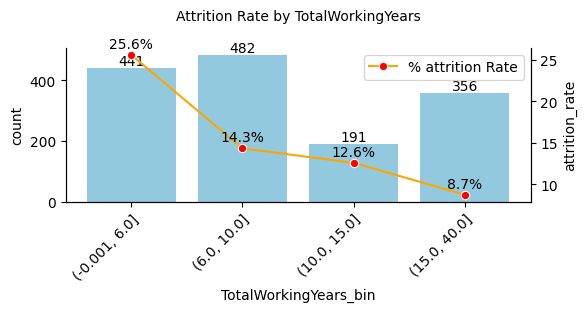

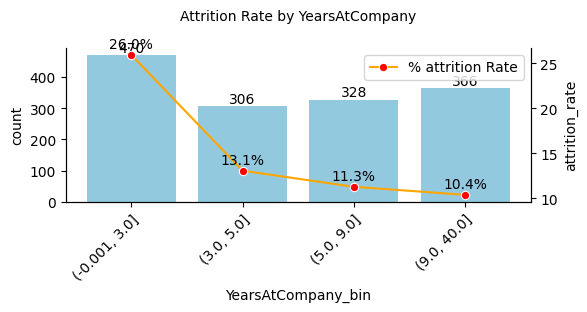

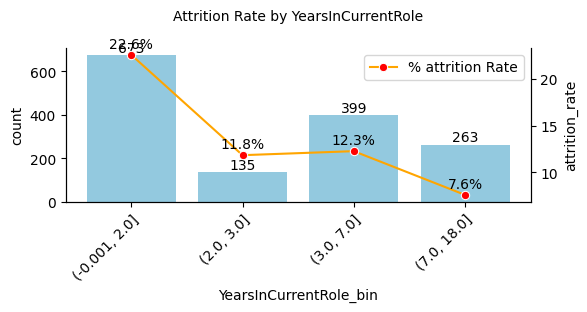

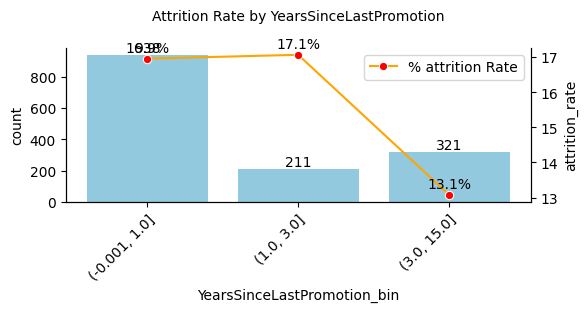

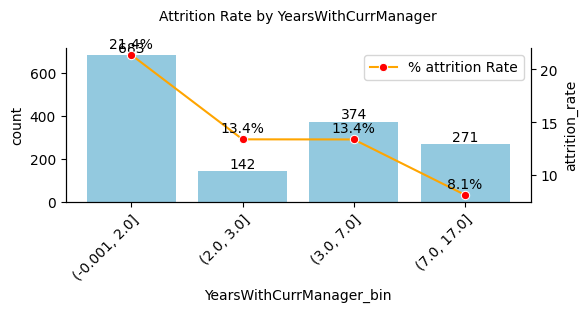

In [80]:
for col in num_col:
  attrition_rate(col)

### Data Preprocessing

In [81]:
df['Gender'] = np.where(df['Gender'] == 'Male', 0, 1)
df['OverTime'] = np.where(df['OverTime'] == 'No', 0, 1)
df['Attrition'] = np.where(df['Attrition'] == 'No', 0, 1)

In [82]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})

In [83]:
obj_col = [i for i in obj_col if i not in binary_col+['BusinessTravel', 'MaritalStatus']]
obj_col

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_col:
  df[col] = le.fit_transform(df[col])

In [84]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,2,1,94,3,2,7,4,0,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,4,0,92,2,1,2,3,0,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


### Data Splitting

In [85]:
X = df.drop('Attrition', axis=1) # X value contains all the variables except labels
y = df['Attrition'] # these are the labels

In [86]:
### Scaling X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.547619,0.5,0.715820,1.0,0.000000,0.25,0.2,0.333333,1.0,0.914286,0.666667,0.25,0.875,1.000000,0.0,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,1.0,0.126700,0.5,0.250000,0.00,0.2,0.666667,0.0,0.442857,0.333333,0.25,0.750,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,0.5,0.909807,0.5,0.035714,0.25,0.8,1.000000,0.0,0.885714,0.333333,0.00,0.250,0.666667,0.0,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,1.0,0.923407,0.5,0.071429,0.75,0.2,1.000000,1.0,0.371429,0.666667,0.00,0.750,0.666667,0.5,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.5,0.350036,0.5,0.035714,0.00,0.6,0.000000,0.0,0.142857,0.666667,0.00,0.250,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,1.0,0.559771,0.5,0.785714,0.25,0.6,0.666667,0.0,0.157143,1.000000,0.25,0.250,1.000000,0.5,0.082254,0.409396,0.444444,0.0,0.428571,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.5,0.365784,0.5,0.178571,0.00,0.6,1.000000,0.0,0.171429,0.333333,0.50,0.000,0.000000,0.5,0.472986,0.777474,0.444444,0.0,0.285714,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.5,0.037938,0.5,0.107143,0.50,0.2,0.333333,0.0,0.814286,1.000000,0.25,0.500,0.333333,0.5,0.270300,0.123670,0.111111,1.0,0.642857,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,1.0,0.659270,1.0,0.035714,0.50,0.6,1.000000,0.0,0.471429,0.333333,0.25,0.875,0.333333,0.5,0.230700,0.447661,0.222222,0.0,0.214286,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Data Modelling

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, make_scorer

##### Function Result Summary

In [89]:
summ_results = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
def test_result(model_name, preds, y_test_data, summary):
    # Extract Accuracy, precision, recall, and f1 score of the prediction
    accuracy = (accuracy_score(y_test_data, preds)*100).round(2).astype(str)
    precision = (precision_score(y_test_data, preds)*100).round(2).astype(str)
    recall = (recall_score(y_test_data, preds)*100).round(2).astype(str)
    f1 = (f1_score(y_test_data, preds)*100).round(2).astype(str)
    auc = roc_auc_score(y_test_data, preds).round(2).astype(str)

    # Create table of results
    model_score = pd.DataFrame([[model_name, '{0}%'.format(accuracy), '{0}%'.format(precision),
                                 '{0}%'.format(recall), '{0}%'.format(f1), auc]],
                               columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])
    summary = pd.concat([summary, model_score], ignore_index=True)

    return summary

##### Function Confusion Matrix (with threshold)

In [90]:
def check_model(model, threshold=0.5, is_xgb = False):
    if is_xgb :
        model.fit(X_train, y_train.replace({'yes':1,'no':0}))
        label = np.array(['no', 'yes'], dtype='object')
    else:
        model.fit(X_train, y_train)
        label = model.classes_

    y_pred = np.where(model.predict_proba(X_test)[:,1]<=threshold, y.unique()[1], y.unique()[0])
    df_cv = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = label, index = label)
    print(classification_report(y_test, y_pred))
    cmap = sns.light_palette("seagreen", as_cmap=True)
    fig = sns.heatmap(df_cv, cmap=cmap, annot=True, fmt='d', cbar=False)
    fig.set_xlabel('Predicted');
    fig.set_ylabel('Actual');
    fig.set_title(f'Label: Attrition | Model: {type(model).__name__}')

##### Function Cross Validation

In [91]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
def cross_val(X, y, model, skf, is_xgb=False, threshold=0.5):
    cv = {'tn':[], 'fp':[], 'fn':[], 'tp':[],
        'prec_yes':[], 'recall_yes':[], 'prec_no':[], 'recall_no':[],
        'accuracy':[], 'f1_score':[]}
    for train, val in skf.split(X, y):
        X_cv_train, X_cv_val = X[train], X[val]
        y_cv_train, y_cv_val = y.iloc[train], y.iloc[val]
        model.fit(X_cv_train, y_cv_train)
        if is_xgb:
            y_cv_pred = np.where(model.predict_proba(X_cv_val)[:,1] <= threshold, 0, 1)
        else:
            y_cv_pred = np.where(model.predict_proba(X_cv_val)[:,1] <= threshold, y.unique()[0], y.unique()[1])
        cm_ravel = confusion_matrix(y_cv_val, y_cv_pred).ravel()
        for i, cm_i in enumerate(['tn', 'fp', 'fn', 'tp']):
            cv[cm_i].append(cm_ravel[i])
        cr = classification_report(y_cv_val, y_cv_pred, output_dict=True)
        if is_xgb:
            label = ['1', '0']
        else:
            label = [str(y.unique()[0]), str(y.unique()[1])]
        cv['prec_yes'].append(cr[label[0]]['precision'])
        cv['recall_yes'].append(cr[label[0]]['recall'])
        cv['prec_no'].append(cr[label[1]]['precision'])
        cv['recall_no'].append(cr[label[1]]['recall'])
        cv['accuracy'].append(cr['accuracy'])
        cv['f1_score'].append(cr[label[0]]['f1-score'])
    df_cv = pd.DataFrame(cv)
    df_mean = pd.DataFrame([['']*4 + list(df_cv.mean().values[4:])], columns=df_cv.columns, index=['mean'])
    df_std_dev = pd.DataFrame([['']*4 + list(df_cv.std().values[4:])], columns=df_cv.columns, index=['std.dev'])
    return pd.concat([df_cv, df_mean, df_std_dev])

##### Function Cross Validation Result

In [92]:
def cv_results(model_name, model_object, metric, summary):

    metric_dict = {'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'auc': 'mean_test_roc_auc'}

    cv_results_df = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results_df.iloc[cv_results_df[metric_dict[metric]].idxmax(), :]

    accuracy = (best_estimator_results.mean_test_accuracy*100).round(2).astype(str)
    precision = (best_estimator_results.mean_test_precision*100).round(2).astype(str)
    recall = (best_estimator_results.mean_test_recall*100).round(2).astype(str)
    f1 = (best_estimator_results.mean_test_f1*100).round(2).astype(str)
    auc = best_estimator_results.mean_test_roc_auc.round(2).astype(str)

    model_score = pd.DataFrame([[model_name, '{0}%'.format(accuracy), '{0}%'.format(precision), '{0}%'.format(recall), '{0}%'.format(f1), auc]], columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'])
    summary = pd.concat([summary, model_score], ignore_index=True)

    return summary

#### 1. Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

##### 1.1 Logistic Regression Base Model

In [94]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
summ_results = test_result('Logistic Regression Base Model (Testing Test Prediction)', y_pred, y_test, summ_results)

##### 1.2 Logistic Regression (Hyperparameter Tuning)

In [95]:
hyperpara = {'penalty':['none', 'l1', 'l2','elasticnet'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': [100, 10, 1.0, 0.1, 0.01]}
log_reg_gscv = GridSearchCV(log_reg, hyperpara, scoring = scoring, cv=skf, refit="f1", n_jobs=-1, verbose=2)
log_reg_gscv = log_reg_gscv.fit(X_train,y_train)
summ_results = cv_results('Logistic Regression - Tuned (Cross-Validation)', log_reg_gscv, 'f1', summ_results)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


##### 1.3 Logistic Regression - Tuned (Testing Set Prediction)

In [96]:
log_reg_gscv_pred = log_reg_gscv.best_estimator_.predict(X_test)
summ_results = test_result('Logistic Regression - Tuned (Testing Set Prediction)', log_reg_gscv_pred, y_test, summ_results)

#### 2. Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

##### 2.1 Random Forest Base Model

In [98]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
summ_results = test_result('Random Forest Base Model (Testing Test Prediction)', y_pred, y_test, summ_results)

##### 2.2 Random Forest (Hyperparameter Tuning)

In [99]:
hyperpara = {'max_depth': [8, 10, 15],
             'min_samples_leaf': [3, 4],
             'min_samples_split': [5, 10],
             'max_features': [8, 16, 24],
             'n_estimators': [100]}
rf_gscv = GridSearchCV(rf, hyperpara, scoring = scoring, cv=skf, refit="f1", n_jobs=-1, verbose=2)
rf_gscv = rf_gscv.fit(X_train,y_train)
summ_results = cv_results('Random Forest - Tuned (Cross-Validation)', rf_gscv, 'f1', summ_results)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


##### 2.3 Random Forest - Tuned (Testing Set Prediction)

In [100]:
rf_gscv_pred = rf_gscv.best_estimator_.predict(X_test)
summ_results = test_result('Logistic Regression - Tuned (Testing Set Prediction)', rf_gscv_pred, y_test, summ_results)

#### 3. Decision Tree Classifier

##### 3.1 Decision Tree Base Model (Testing Set Prediction)

In [101]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [102]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
summ_results = test_result('Decision Tree Base Model (Testing Test Prediction)', y_pred, y_test, summ_results)

##### 3.2 Decision Tree (Hyperparameter Tuning)

In [103]:
hyperpara = {'max_depth':[15, 25, 50, None],
             'min_samples_leaf': [2, 3, 4, 5, 8]}
dt_gscv = GridSearchCV(dt, hyperpara, scoring = scoring, cv=skf, refit="f1", n_jobs=-1, verbose=2)
dt_gscv = dt_gscv.fit(X_train,y_train)
summ_results = cv_results('Decision Tree - Tuned (Cross-Validation)', dt_gscv, 'f1', summ_results)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


##### 3.3 Decision Tree - Tuned (Testing Set Prediction)

In [104]:
dt_gscv_pred = dt_gscv.best_estimator_.predict(X_test)
summ_results = test_result('Decision Tree - Tuned (Testing Set Prediction)', dt_gscv_pred, y_test, summ_results)

#### 4. XGBoost

In [105]:
from xgboost import XGBClassifier, plot_importance

##### 4.1 XGBoost Base Model (Testing Set Prediction)

In [106]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
summ_results = test_result('XGBoost Base Model (Testing Test Prediction)', y_pred, y_test, summ_results)

##### 4.2 XGBoost (Hyperparameter Tuning)

In [107]:
hyperpara = {'max_depth': [8, 10, 20],
             'min_child_weight': [8, 10],
             'learning_rate': [.3, .2, .1],
             'n_estimators': [100],
             'colsample_bytree': [.9, .8, .7]}
xgb_gscv = GridSearchCV(xgb, hyperpara, scoring = scoring, cv=skf, refit="f1", n_jobs=-1, verbose=2)
xgb_gscv = xgb_gscv.fit(X_train,y_train)
summ_results = cv_results('XGBoost - Tuned (Cross-Validation)', xgb_gscv, 'f1', summ_results)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


##### 4.3 XGBoost - Tuned (Testing Set Prediction)

In [108]:
xgb_gscv_pred = xgb_gscv.best_estimator_.predict(X_test)
summ_results = test_result('XGBoost - Tuned (Testing Set Prediction)', xgb_gscv_pred, y_test, summ_results)

In [109]:
summ_results

,model,accuracy,precision,recall,f1_score,roc_auc_score
0,Logistic Regression Base Model (Testing Test P...,88.44%,66.67%,25.64%,37.04%,0.62
1,Logistic Regression - Tuned (Cross-Validation),86.05%,64.78%,38.34%,47.91%,0.83
2,Logistic Regression - Tuned (Testing Set Predi...,88.78%,62.5%,38.46%,47.62%,0.67
3,Random Forest Base Model (Testing Test Predict...,87.76%,71.43%,12.82%,21.74%,0.56
4,Random Forest - Tuned (Cross-Validation),86.05%,72.26%,29.74%,41.73%,0.82
5,Logistic Regression - Tuned (Testing Set Predi...,86.05%,41.67%,12.82%,19.61%,0.55
6,Decision Tree Base Model (Testing Test Predict...,77.89%,21.74%,25.64%,23.53%,0.56
7,Decision Tree - Tuned (Cross-Validation),83.08%,50.62%,39.4%,43.92%,0.69
8,Decision Tree - Tuned (Testing Set Prediction),82.31%,19.05%,10.26%,13.33%,0.52
9,XGBoost Base Model (Testing Test Prediction),86.73%,50.0%,20.51%,29.09%,0.59
